### 【総合演習２】賃貸物件情報を集計・可視化しよう

総合演習１では物件のデータ「room.csv」とその物件の建物のデータ「build.csv」を加工して、「chintai.csv」ファイルを作成しました。  
今回の総合演習２では、「chintai.csv」のデータを使って集計や可視化を行います。  
  
【総合演習の取り組み方】  
* 最初に【Quiestion1】～【Question3】までを実施しましょう。
* 上記問題については、上から順番に実施しましょう。
* 総合演習はテキストを見ながら実施していただいてOKです。

---
#### 【Question1】ライブラリをインポートしよう
---

pandas、numpy、matplotlibのライブラリをインポートしてください。  
matplotlibについては、pyplotをインポートし、jupyter notebook上に表示できるようにしましょう。  
また、matplotlibでグラフ化する際に日本語が文字化けしないようにフォントを'Yu Mincho'に変更しましょう。

In [1]:
# ライブラリインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# matplotlibの日本語文字化け対応
import matplotlib
font = {'family':'Yu Mincho'}
matplotlib.rc('font', **font)  

---
#### 【Question2】ファイルを読み込もう
---

総合演習問題_1で作成した「chintai.csv」を読込み、chintaiという変数に格納してください。    
読み込んだ変数の先頭5行を表示させて正しく読み込めているか確認しましょう。  

In [3]:
# chintai.csvの読み込みと先頭5行の表示
chintai = pd.read_csv('chintai.csv')

chintai.head()

,物件ID,建物ID,物件階,間取り,面積,家賃,管理費,敷金,礼金,平米単価,...,駅徒歩1,沿線2,駅名2,駅徒歩2,沿線3,駅名3,駅徒歩3,駅徒歩最短,山手線駅,山手線駅徒歩
0,R0000001,B0000001,2,44K,552.58,2484000.0,0,0.0,1.0,4495.276702,...,6,ＪＲ山手線,西日暮里駅,12.0,東京メトロ千代田線,千駄木駅,16.0,6.0,田端駅,6.0
1,R0000002,B0000002,7,1K,26.10,100000.0,8000,1.0,1.0,3831.417625,...,8,ＪＲ山手線,御徒町駅,5.0,東京メトロ日比谷線,仲御徒町駅,2.0,2.0,御徒町駅,5.0
2,R0000003,B0000002,8,1K,26.10,99500.0,8000,1.0,1.0,3812.260536,...,8,ＪＲ山手線,御徒町駅,5.0,東京メトロ日比谷線,仲御徒町駅,2.0,2.0,御徒町駅,5.0
3,R0000004,B0000003,1,1LDK,40.12,118000.0,5800,0.0,2.0,2941.176471,...,9,ＪＲ山手線,田端駅,10.0,ＪＲ山手線,西日暮里駅,14.0,9.0,駒込駅,9.0
4,R0000005,B0000004,3,3LDK,89.67,235000.0,0,2.0,0.0,2620.720419,...,3,ＪＲ山手線,西日暮里駅,6.0,ＪＲ山手線,日暮里駅,17.0,3.0,田端駅,3.0


---
#### 【Question3】データを集計／可視化してみよう
---

##### __１）家賃の分布を確認しよう＜可視化＞__
実際のところ山手線沿線の物件はどのような家賃分布になっているでしょう。  
ヒストグラムを使って描画してみましょう。
    
chintaiの「家賃」についてヒストグラムを描画。  
* ビンの数を変えてヒストグラムの印象が変化するか確認しましょう。  
* タイトルは'家賃分布'としてください。  
* X軸には'家賃'、Y軸には'物件数'のラベルを付与してください。  

##### __【＋α】グラフのサイズを変更する__
グラフを描画するときにもう少し大きくしたい、横幅を広げたい等と思うことがあります。  
グラフの大きさや縦横サイズを変更することができます。    

`plt.figure(figsize=(横インチ, 縦インチ))` # 描画するグラフサイズを変更  

C:\Users\u072265\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\u072265\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


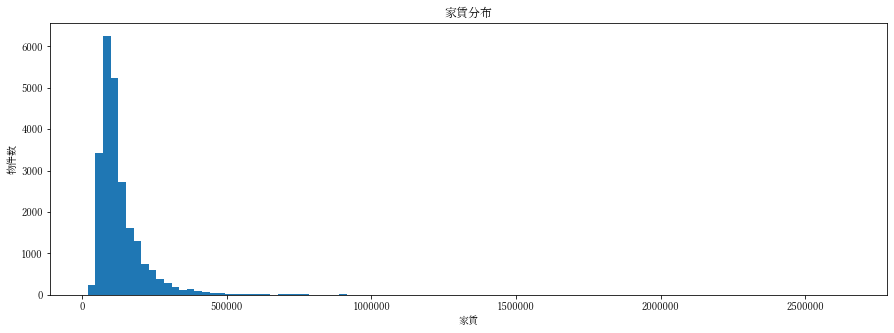

In [4]:
# chintaiの「家賃」についてヒストグラムを描画
plt.figure(figsize=(15, 5))
plt.hist(chintai['家賃'], bins=100)
plt.title('家賃分布')
plt.xlabel('家賃')
plt.ylabel('物件数')
plt.show()

##### __２）家賃の分布を確認しよう＜数値化＞__
家賃についてヒストグラムで確認しましたが、数値でも確認してみましょう。  
    
chintaiの「家賃」について要約統計量を算出。  

##### __【＋α】指数表示をやめたい場合__
桁が大きい場合等は指数表示になってしまうことがあります。    
実際は指数表示で確認することが多いのですが、見づらいと思う方もいると思います。  
表示形式を変更させることで指数表示にしない方法があります。  
※必要に応じて（指数表示が見づらい等あれば）使用してください。

`pd.options.display.float_format = '{:.1f}'.format` # 小数点1桁での表示  

In [5]:
# 家賃の要約統計量を出力する
chintai['家賃'].describe()

count    2.380200e+04
mean     1.343641e+05
std      1.038035e+05
min      2.000000e+04
25%      8.200000e+04
50%      1.070000e+05
75%      1.500000e+05
max      2.650000e+06
Name: 家賃, dtype: float64

##### __３）駅によって家賃は異なるのか確認してみよう＜数値化＞__
駅によって家賃の傾向が異なるのかは気になるところです。  
    
* chintaiの「家賃」について「山手線駅」毎に平均・最小値・最大値を算出し、平均の降順で並べてください。  

In [6]:
# chintaiの「家賃」について「山手線駅」毎に確認
chintai.groupby('山手線駅')['家賃'].agg(['mean', 'min', 'max']).sort_values(by='mean', ascending=False)

,mean,min,max
山手線駅,,,
渋谷駅,209042.348754,39000.0,2000000.0
原宿駅,204782.500000,40000.0,790000.0
浜松町駅,201436.527675,63000.0,966000.0
新橋駅,185473.177843,70000.0,950000.0
恵比寿駅,183276.512687,26000.0,2650000.0
有楽町駅,176809.523810,96000.0,506000.0
田町駅,173341.434846,52000.0,2500000.0
目黒駅,165960.574621,49000.0,949000.0
品川駅,160746.698679,25000.0,900000.0


##### __４）駅によって家賃は異なるのか確認してみよう＜可視化＞__
先ほど駅別に「家賃」の傾向を数値で確認しました。これを層別箱ひげ図で確認してみましょう。  
    
層別の箱ひげ図はseabornというmatplotlibのラッパーとして動作するライブラリを使って描画します。  
グラフの描画は様々な方法で行うことができます。  
    
* 以下を実行してください。

     山手線駅             家賃
18    渋谷駅  209042.348754
3     原宿駅  204782.500000
17   浜松町駅  201436.527675
12    新橋駅  185473.177843
9    恵比寿駅  183276.512687
14   有楽町駅  176809.523810
19    田町駅  173341.434846
22    目黒駅  165960.574621
4     品川駅  160746.698679
15    東京駅  153275.862069
24   秋葉原駅  143897.729618
11    新宿駅  142150.891266
23    神田駅  138953.722334
8    御徒町駅  134200.000000
1    五反田駅  131790.898345
2    代々木駅  129531.746032
6     大崎駅  128866.724437
0     上野駅  122073.772610
10  新大久保駅  110967.901235
27  高田馬場駅  108323.155216
28    鶯谷駅  105502.398801
7     巣鴨駅  104476.301218
26    駒込駅  103873.689727
21    目白駅  103798.464724
13   日暮里駅   99773.571429
5     大塚駅   98326.449133
16    池袋駅   97364.863888
25  西日暮里駅   95800.756430
20    田端駅   94280.416157
18      渋谷駅
3       原宿駅
17     浜松町駅
12      新橋駅
9      恵比寿駅
14     有楽町駅
19      田町駅
22      目黒駅
4       品川駅
15      東京駅
24     秋葉原駅
11      新宿駅
23      神田駅
8      御徒町駅
1      五反田駅
2      代々木駅
6       大崎駅
0       上野駅
10    新大久保駅
27    高田馬場駅
28      鶯谷

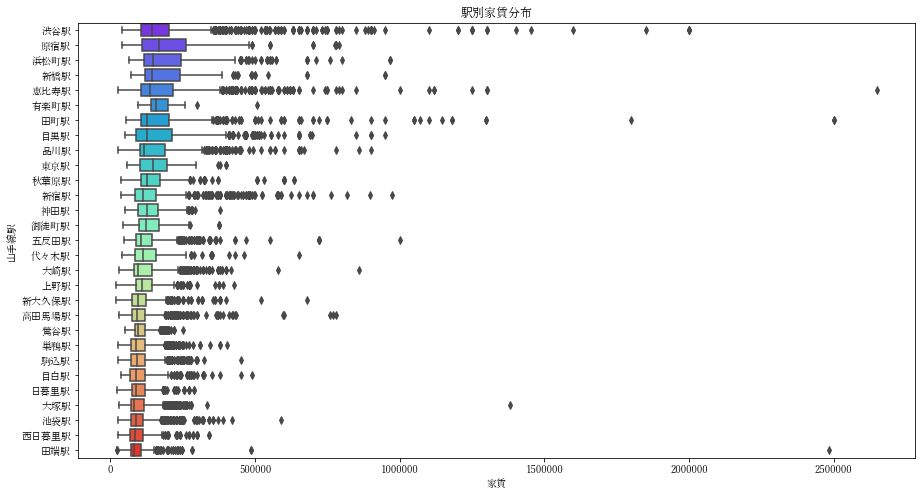

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

chintai_gby_sby = chintai.groupby(['山手線駅'], as_index=False)['家賃'].mean().sort_values('家賃', ascending=False)
print(chintai_gby_sby)

chintai_label = chintai_gby_sby['山手線駅']
print(chintai_label)

chintai_labellist = chintai_label.tolist()
print(chintai_labellist)

plt.figure(figsize=(15, 8))
sns.boxplot(x='家賃', y='山手線駅', orient='h', data=chintai, palette='rainbow', order=chintai_labellist)
plt.title('駅別家賃分布')
plt.show()

【ここに気づきを書いてみましょう】  
* XXXXXX
* XXXXXX

##### __５）駅ごとの物件数を確認する＜グラフ化＞__
駅ごとに家賃分布を確認しました。  
しかし、そもそもの駅における物件数はどうだったでしょう。  
    
* chintaiの駅ごとの物件数を集計し、降順（物件数が多い順）で棒グラフを描画してください。  
* タイトルとx軸、y軸のラベルを適切に表示してください。
* 見やすいようにグラフを調整してください。

##### __【＋α】groupbyした項目の値__
グループ別に集計をする場合はgroupbyを使用しますが、指定した項目はインデックスとして使用されます。    
インデックスとなった値を抽出する際は、`index`を使用します。  

`DataFrame.index` # インデックス名の表示

##### __【＋α】棒グラフの描画__
棒グラフを描画する際は、集計された度数分布表がインプットになります。  
インプットの順番に表示されるため、どの順番で表示するかは事前に加工しておきます。  

`plt.bar(棒を作る単位の項目名, 度数集計された値)`  # 縦棒グラフ  
`plt.barh(棒を作る単位の項目名, 度数集計された値)` # 横棒グラフ

山手線駅
池袋駅      2351
恵比寿駅     1537
田町駅      1366
大塚駅      1327
目黒駅      1254
高田馬場駅    1179
渋谷駅      1124
新宿駅      1122
秋葉原駅      969
駒込駅       954
巣鴨駅       903
五反田駅      848
品川駅       833
田端駅       817
上野駅       774
鶯谷駅       668
西日暮里駅     661
目白駅       652
新大久保駅     648
大崎駅       577
日暮里駅      560
浜松町駅      542
神田駅       497
代々木駅      441
御徒町駅      374
新橋駅       343
原宿駅       240
東京駅       203
有楽町駅       42
dtype: int64
Index(['池袋駅', '恵比寿駅', '田町駅', '大塚駅', '目黒駅', '高田馬場駅', '渋谷駅', '新宿駅', '秋葉原駅',
       '駒込駅', '巣鴨駅', '五反田駅', '品川駅', '田端駅', '上野駅', '鶯谷駅', '西日暮里駅', '目白駅',
       '新大久保駅', '大崎駅', '日暮里駅', '浜松町駅', '神田駅', '代々木駅', '御徒町駅', '新橋駅', '原宿駅',
       '東京駅', '有楽町駅'],
      dtype='object', name='山手線駅')


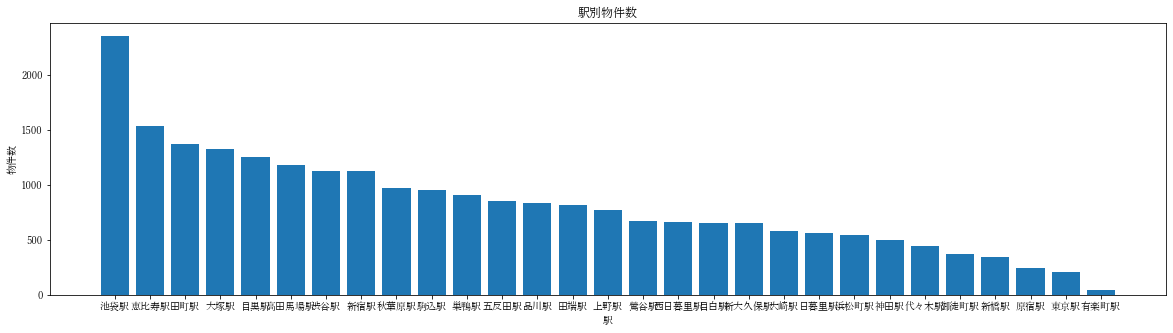

In [12]:
# 駅ごとのデータ数をカウントし、件数降順にソートした結果を、新しい変数(名前任意)に格納
bukken_size =chintai.groupby(by='山手線駅').size().sort_values(ascending=False)
print(bukken_size)

# 新しく作成した変数を使って棒グラフを描画する
plt.figure(figsize=(20,5))
print(bukken_size.index)
plt.bar(bukken_size.index, bukken_size)
plt.title('駅別物件数')
plt.xlabel('駅')
plt.ylabel('物件数')
plt.show()

##### __６）家賃と面積は関係あるのか確認しよう＜グラフ化＞__
家賃に影響を及ぼすのはなんでしょうか。  
今回は面積が広いほど家賃が高くなるのかという相関関係を可視化で確認しましょう。  
    
* chintaiの家賃と面積について散布図を描画してください。
* タイトルとx軸、y軸のラベルを適切に表示してください。
* 見やすいようにグラフを調整してください。

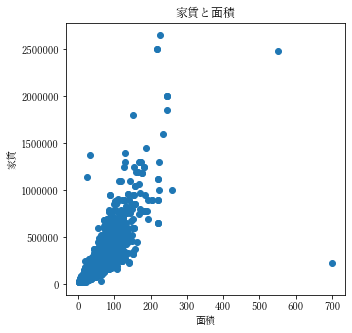

In [10]:
# 賃貸と面積の散布図
plt.figure(figsize=(5,5))
plt.scatter(chintai['面積'], chintai['家賃'])
plt.title('家賃と面積')
plt.xlabel('面積')
plt.ylabel('家賃')
plt.show()

##### __EXTRA）他にも疑問に思ったことについて、データを集計・可視化して検証しましょう__
1つの項目の分布を確認することや、2つの項目の関連性を確認することは、データ分析において重要なタスクです。  
またデータをより上手く表現できるように加工を行う大事なインプットにもなります。  
自分で思いついた仮説を元に、集計・可視化を実施してください。

例えば  
1Rだけに絞ったら駅別の家賃分布はどう変わるのだろう。  
徒歩の時間と家賃の関係は関連があるのか。
可視化ででてきたあの外れ値はどんな物件なのか。  
    

##### __EXTRA）集計・可視化で気づいたことをデータ加工に反映させよう__
総合演習１でも記載した通り、集計や可視化を行うことで、追加の気づきを加工に反映させることもあります。  
例えば  
特殊すぎるデータがあるから外れ値として除外しよう。  
リビングがあるのは大きく家賃に影響するのが確認出来たら、間取りにリビングがあればリビングフラグを作ろう。  
  
総合演習２を実施して得た知見やアイディアを元に、総合演習１のプログラムに追加のデータ加工を実施してみましょう。

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■END）